In [1]:
import pandas as pd

df = pd.read_csv('Data/군집분석데이터.csv', encoding='ms949')
df.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [2]:
from konlpy.tag import Hannanum

han = Hannanum()
docs = []
for i in df['기사내용']:
    # 명사만 추출
    docs.append(han.nouns(i))

# 단어에 공백을 추가
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])
print(docs[:2])

['유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성', '유한양행 1조4000억원 규모 기술이전 계약 체결 소식 가격제한폭 5일 오전 9시 3분 유한양행 전날 5만3000원(29. 78 23만1000원 거래 사흘 연속 강세 유한양행 글로벌 제약사 존슨앤존슨(J&J) 자회사 얀센 바이오테크(Janssen 저해제 ‘레이저티닙’(프로젝트명 YH25448) 기술수출 계약 체결 이날 계약규모 약 1조4000억원(12억5500만달러) 반환 의무 계약금 560억원(5000 이번 계약 얀센 전세계 레이저티닙 개발 제조 상업화 독점적 권리 국내 개발 상업화 권리 유한양행 유 유한양행 얀센 바이오텍 내년 레이저티닙 단일요법 병용요법 글로벌 임상시험 공동 진행 예정 유한양행 개발 허가 상업화 성공 단계별 마일스톤 기술료 12억500 달러(약 1조3500억원 수 임상시험 허가 상업화 실패 경우 기술이전 계약 종료 경우 유한양행 얀센 측 지급 위약금']


In [7]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# BOW (Bag of Words)를 이용한 문서-단어 행렬 생성
# 문서집합에서 단어 토큰을 생성하고 각 단어의 수를 세어서 인코딩한 벡터를 생성(행은 문서번호, 컬럼은 각 단어)

vec = CountVectorizer()   # 정수인코딩, 단어사전, 단어의 출현빈도
vec_tf = TfidfVectorizer()   # 단어의 출현빈도를 더 자세히 보려 함
X = vec.fit_transform(docs)
X_tf = vec_tf.fit_transform(docs)
df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
df2_tf = pd.DataFrame(X_tf.toarray(), columns=vec.get_feature_names_out())
df2.head()   # 중복단어 빼고 581개

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


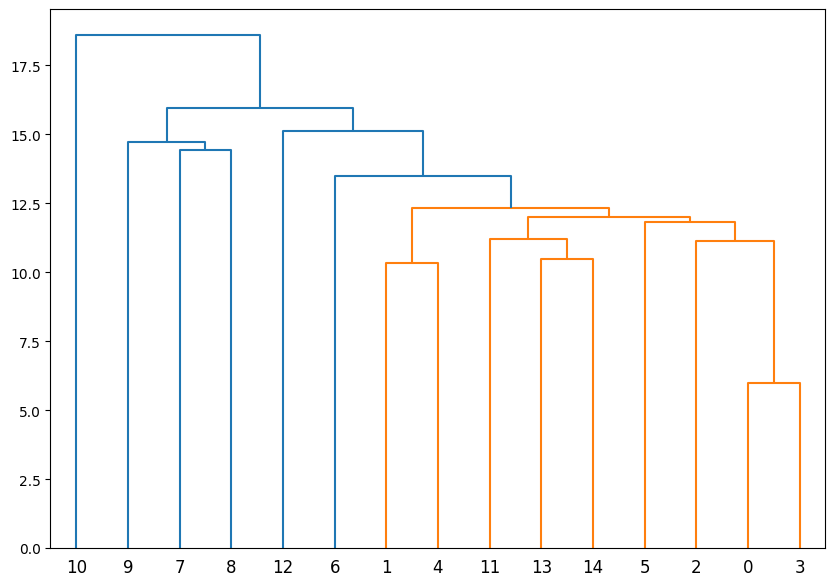

In [4]:
# 계층적 클러스터링 : 하나의 데이터 샘플을 하나의 클러스터로 보고 가장 유사도가 높은 클러스터를 합치면서 클러스터 갯수를 줄여가는 방법

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# 클러스터수를 3으로 설정
cluster = AgglomerativeClustering(n_clusters=3)  
cluster.fit_predict(df2)  

# 덴드로그램 출력, 트리를 나타내는 다이어그램
plt.figure(figsize=(10, 7))  
result=shc.linkage(df2)
shc.dendrogram(result)
plt.show()

In [5]:
cluster.labels_

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

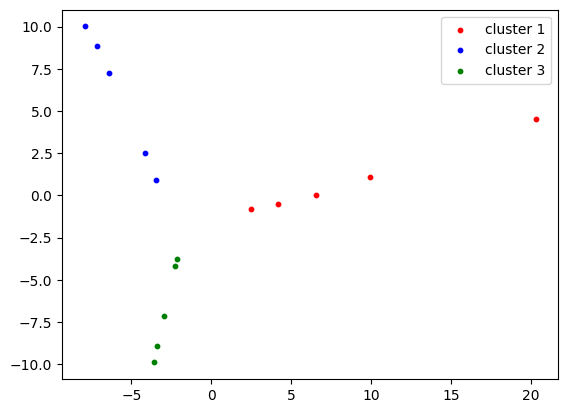

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# plotting을 위해 주성분분석으로 차원을 2차원으로 축소
pca = PCA(n_components=2,random_state=10)
components = pca.fit_transform(df2)
df3 = pd.DataFrame(data = components, columns = ['component 1', 'component 2'])
df3.index=df['검색어']
# print(df3)
# kmeans.labels_ == 0
# x축 : first, y축 : second 번호로 나타낸 후 시각화
plt.scatter(df3.iloc[cluster.labels_ == 0, 0], df3.iloc[cluster.labels_ == 0, 1], s=10, c='r', label='cluster 1')
plt.scatter(df3.iloc[cluster.labels_ == 1, 0], df3.iloc[cluster.labels_ == 1, 1], s=10, c='b', label='cluster 2')
plt.scatter(df3.iloc[cluster.labels_ == 2, 0], df3.iloc[cluster.labels_ == 2, 1], s=10, c='g', label='cluster 3')
plt.legend()
plt.show()

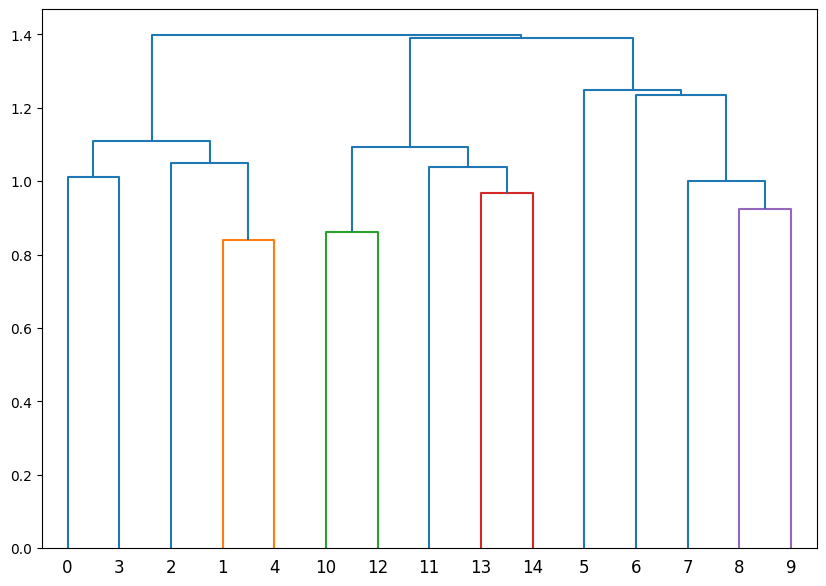

In [8]:
# 클러스터수를 3으로 설정
cluster_tf = AgglomerativeClustering(n_clusters=3)  
cluster_tf.fit_predict(df2_tf)  

# 덴드로그램 출력, 트리를 나타내는 다이어그램
plt.figure(figsize=(10, 7))  
result=shc.linkage(df2_tf)
shc.dendrogram(result)
plt.show()

In [9]:
cluster_tf.labels_

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1], dtype=int64)

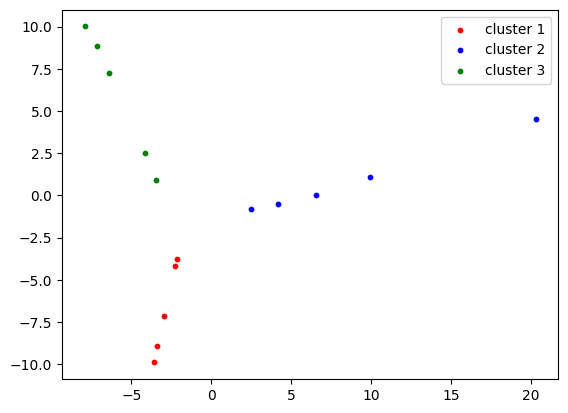

In [10]:
# plotting을 위해 주성분분석으로 차원을 2차원으로 축소
pca = PCA(n_components=2,random_state=10)
components = pca.fit_transform(df2)
df3 = pd.DataFrame(data = components, columns = ['component 1', 'component 2'])
df3.index=df['검색어']
# print(df3)
# kmeans.labels_ == 0
# x축 : first, y축 : second 번호로 나타낸 후 시각화
plt.scatter(df3.iloc[cluster_tf.labels_ == 0, 0], df3.iloc[cluster_tf.labels_ == 0, 1], s=10, c='r', label='cluster 1')
plt.scatter(df3.iloc[cluster_tf.labels_ == 1, 0], df3.iloc[cluster_tf.labels_ == 1, 1], s=10, c='b', label='cluster 2')
plt.scatter(df3.iloc[cluster_tf.labels_ == 2, 0], df3.iloc[cluster_tf.labels_ == 2, 1], s=10, c='g', label='cluster 3')
plt.legend()
plt.show()